In [28]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

In [29]:
def make_data(N, f=0.3, rseed=1):
    rand = np.random.RandomState(rseed)
    x = rand.randn(N)
    x[int(f * N):] += 5
    return x

x = make_data(1000)

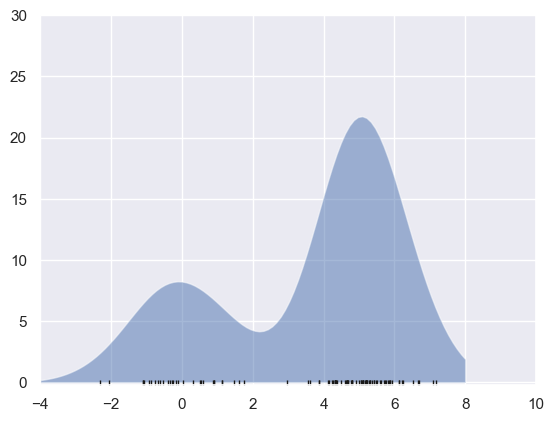

In [30]:
x = make_data(100)

from scipy.stats import norm
x_d = np.linspace(-4, 8, 100)
density = sum(norm(xi).pdf(x_d) for xi in x)

plt.fill_between(x_d, density, alpha=0.5)
plt.plot(x, np.full_like(x, -0.1), '|k', markeredgewidth=1)

plt.axis([-4, 10, -0.2, 30]);

In [4]:
import numpy as np
import matplotlib.pyplot as plt


def b_spline_basis(i, k, t, x):
    """
    Compute the B-spline basis function N_i,k at x.

    Parameters:
    - i: index of the basis function
    - k: degree of the spline (order = k + 1)
    - t: knot vector (non-decreasing sequence)
    - x: position(s) to evaluate the basis function

    Returns:
    - values of N_i,k(x)
    """
    if k == 0:
        # zero degree basis function
        return np.where((x >= t[i]) & (x < t[i + 1]), 1.0, 0.0)
    else:
        denom1 = t[i + k] - t[i]
        denom2 = t[i + k + 1] - t[i + 1]

        term1 = 0
        if denom1 != 0:
            term1 = (x - t[i]) / denom1 * b_spline_basis(i, k - 1, t, x)

        term2 = 0
        if denom2 != 0:
            term2 = (t[i + k + 1] - x) / denom2 * b_spline_basis(i + 1, k - 1, t, x)

        return term1 + term2


def b_spline_basis_derivative(i, k, t, x):
    if k == 0:
        # The derivative of degree 0 basis is zero everywhere
        return np.zeros_like(x)
    else:
        denom1 = t[i + k] - t[i]
        denom2 = t[i + k + 1] - t[i + 1]

        term1 = 0
        if denom1 != 0:
            term1 = k / denom1 * b_spline_basis(i, k - 1, t, x)

        term2 = 0
        if denom2 != 0:
            term2 = k / denom2 * b_spline_basis(i + 1, k - 1, t, x)

        return term1 - term2


# Example usage
def b_spline_descriptor(x0_vals, x_min: float = 0, x_max: float = 1, steps=10, degree=3):
    """
    Create a B-spline descriptor for the given range and degree.

    Parameters:
    - x0_vals: array of x values where the B-spline basis will be evaluated
    - x_min: minimum x value
    - x_max: maximum x value
    - degree: degree of the B-spline

    Returns:
    - A function that evaluates the B-spline basis at given x0 values.
    """
    knots, dx = np.linspace(x_min-degree * 0, x_max+degree * 0, steps, retstep=True)  # Create a uniform knot vector
    x_vals = np.linspace(x_min, x_max, steps)
    y_vals = np.zeros(steps)
    # Evaluate the B-spline basis at each x0 value
    for x0 in x0_vals:
        y_vals +=  b_spline_basis(1, degree, knots, x_vals - x0 + np.min(knots) + degree * dx/2 + 3/2* dx )

    return y_vals, x_vals

1.0000000000000002 0.9999999999999998
1.0000000000000016 1.0000000000000013
1.0000000000000016 1.0000000000000013
0.9999999999999949 0.9999999999999953
0.9999999999999927 0.9999999999999922
0.9999999999999913 0.9999999999999921
1.0000000000000087 1.0000000000000089
0.9999999999999998 0.9999999999999998
0.9999999999999891 0.9999999999999889


Text(0, 0.5, 'Maximum Value of B-spline Descriptor')

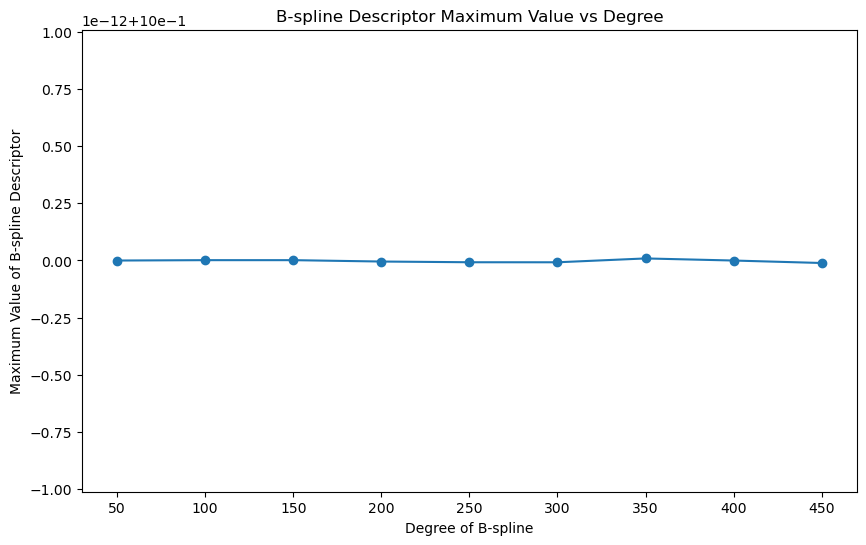

In [5]:
degree = 3
step_list = np.arange(50, 500, 50)
x_max_list = []
for steps in step_list:
    y_vals, x_vals = b_spline_descriptor([1], x_min=-5, x_max=10, steps=steps, degree=degree)
    print(np.sum(y_vals), np.sum(x_vals * y_vals))
    x_max = np.sum(x_vals * y_vals)
    x_max_list.append(x_max)
    # plt.plot(x_vals, y_vals, label=f'Degree {d}')

plt.figure(figsize=(10, 6))
plt.plot(step_list, x_max_list, marker='o')
plt.title('B-spline Descriptor Maximum Value vs Degree')
plt.xlabel('Degree of B-spline')
plt.ylabel('Maximum Value of B-spline Descriptor')


2.0000000000000018 1.9000000000000035
2.0000000000000013 1.9000000000000021
2.0000000000000018 1.900000000000003
2.000000000000001 1.9000000000000021
2.0000000000000013 1.9000000000000017
2.000000000000001 1.9000000000000021
2.0 1.9


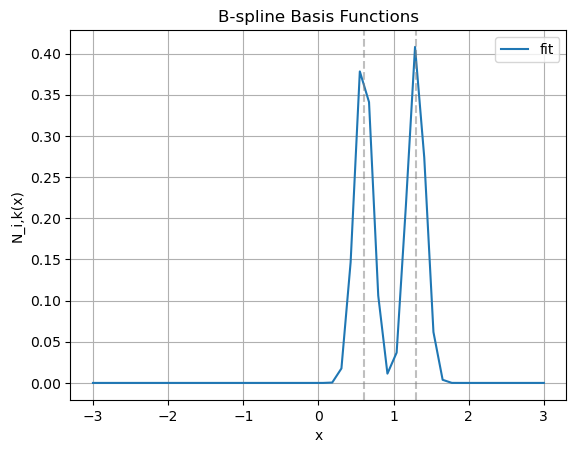

In [6]:
norm_list = []
degree_list = [1, 2, 3, 4, 5, 6, 10]
for degree in degree_list:
    x0_val = [0.6, 1.3]
    y_vals, x_vals = b_spline_descriptor(x0_val, x_min=-3, x_max=3, steps=50, degree=degree)
    print (np.sum(y_vals), np.sum(x_vals * y_vals))
    norm_list.append(np.sum(y_vals))

plt.plot(x_vals, y_vals, label=f"fit")

for xo in x0_val:
    plt.axvline(x=xo, color='gray', linestyle='--', alpha=0.5)
plt.title("B-spline Basis Functions")
plt.xlabel("x")
plt.ylabel("N_i,k(x)")
plt.legend()
plt.grid(True)
plt.show()

norm depends on x_min and x_max, independent on degree and steps!
depends on x_max-x_min, i.e., on the length!!

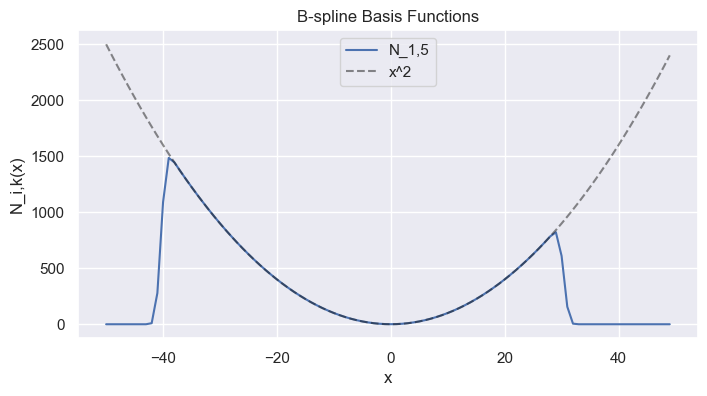

In [220]:
def func(x):
    return x**2


degree = 5  # cubic B-spline
# knot vector
knots = np.arange(-61, 61)  # knots from -1 to 5
n_basis = len(knots) - degree - 1  # number of basis functions

x_vals = np.arange(-50, 50)  # np.linspace(-1, 50, 50000, retstep=True)

# Plot basis functions
plt.figure(figsize=(8, 4))

y_vals = np.zeros(len(x_vals))
y_vals_derivative = np.zeros(len(x_vals))
x0_min = -40
x0_max = 30
steps = 100
x0_vals, dx = np.linspace(x0_min, x0_max, steps, retstep=True)
for x0 in x0_vals:
    y_vals += (
        dx
        * func(x0)
        * b_spline_basis(1, degree, knots, x_vals - x0 + np.min(knots) + 1.5 + degree/2)
    )
    y_vals_derivative += (
        dx
        * func(x0)
        * b_spline_basis_derivative(1, degree, knots, x_vals - x0 + np.min(knots) + 1.5 + degree/2)
    )
plt.plot(x_vals, y_vals, label=f"N_{1},{degree}")
plt.plot(x_vals, x_vals**2, "k--", label="x^2", alpha=0.5)
plt.title("B-spline Basis Functions")
plt.xlabel("x")
plt.ylabel("N_i,k(x)")
plt.legend()
plt.grid(True)
plt.show()

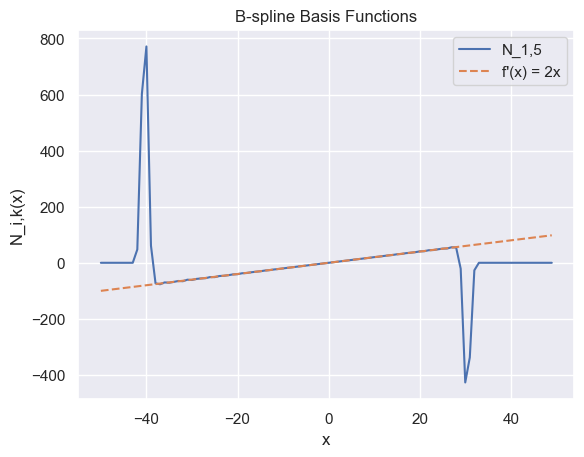

In [167]:
plt.plot(x_vals, y_vals_derivative, label=f'N_{1},{degree}')
plt.plot(x_vals, 2*x_vals, label='f\'(x) = 2x', linestyle='--')
plt.title('B-spline Basis Functions')
plt.xlabel('x')
plt.ylabel('N_i,k(x)')
plt.legend()
plt.grid(True)
plt.show()

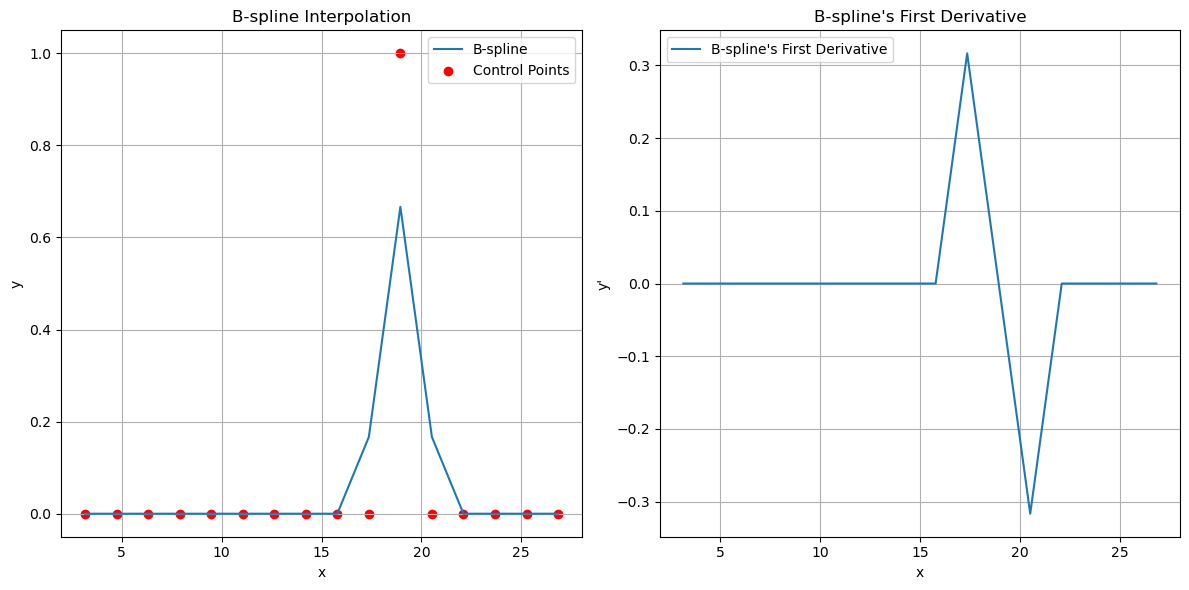

In [ ]:
import numpy as np
from scipy.interpolate import BSpline
import matplotlib.pyplot as plt

# Define the knot vector
# knots = np.array([-2, -1, 0, 1, 2, 3, 4, 5])
# knots = np.array([0, 0, 0, 1, 2, 3, 3, 3])
knots, dx = np.linspace(0, 30, 20, retstep=True)  # Create a uniform knot vector

# Define the degree of the B-spline
degree = 3
# knots = np.concatenate(([0] * (degree - 1), x, [knots[-1]] * (degree-1)))  # Extend the knot vector
x = knots[degree-1:-degree+1]  # Control points, excluding the first and last degree-1 knots


# Define the control points
coefficients = np.zeros(len(x))  # Initialize coefficients to zero
coefficients[10] = 1  # Set a single control point to 1 for demonstration

# Create the B-spline
bspline = BSpline(knots, coefficients, degree)

# Define the x values at which to evaluate the B-spline
x_values = x

# Evaluate the B-spline
y_values = bspline(x_values)

# Evaluate the first derivatives of the B-spline
y_values_derivative = bspline.derivative(nu=1)(x_values)

# Plot the B-spline and its first derivative
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(x_values, y_values, label='B-spline')
# Correct the indexing to match the number of control points
plt.scatter(knots[degree-1:-(degree-1)], coefficients, color='red', label='Control Points')
plt.title('B-spline Interpolation')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(x_values, y_values_derivative, label="B-spline's First Derivative")
plt.title("B-spline's First Derivative")
plt.xlabel('x')
plt.ylabel("y'")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
np.sum(y_values), np.sum(x_values * y_values)

(0.9999999999999994, 18.94736842105262)

In [47]:
import numpy as np
from scipy.interpolate import BSpline
import matplotlib.pyplot as plt

# Define the knot vector
knots, dx = np.linspace(0, 3, 100, retstep=True)  # Create a uniform knot vector

# Define the degree of the B-spline
degree = 3

x_values = knots[degree-1:-degree+1]  # Control points, excluding the first and last degree-1 knots


# Define the control points
coefficients = np.eye(len(knots) - degree - 1)

# Define the x values at which to evaluate the B-spline
# x_values = np.linspace(0, 3, 100)

# Create the B-spline basis functions
num_basis_functions = len(knots) - degree - 1
basis_functions = [BSpline(knots, coefficients[j], degree) for j in range(num_basis_functions)]

# Evaluate the first derivatives of the basis functions at the given x values
design_matrix_derivative = np.array([[basis.derivative(nu=1)(x) for basis in basis_functions] for x in x_values])

# Print the design matrix for the first derivative
print("Design Matrix for First Derivative:")
print(design_matrix_derivative)

# Create the B-spline
bspline = BSpline(knots, np.array([1, 3, 2, 5]), degree)

# Evaluate the B-spline
y_values = bspline(x_values)

# Evaluate the first derivatives of the B-spline
y_values_derivative = bspline.derivative(nu=1)(x_values)

# Plot the B-spline and its first derivative
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(x_values, y_values, label='B-spline')
# Correct the indexing to match the number of control points
plt.scatter(knots[degree-1:-(degree-1)], np.array([1, 3, 2, 5]), color='red', label='Control Points')
plt.title('B-spline Interpolation')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(x_values, y_values_derivative, label="B-spline's First Derivative")
plt.title("B-spline's First Derivative")
plt.xlabel('x')
plt.ylabel("y'")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

Design Matrix for First Derivative:
[[ -66.   115.5  -66.  ...    0.     0.     0. ]
 [ -16.5    0.    16.5 ...    0.     0.     0. ]
 [   0.   -16.5    0.  ...    0.     0.     0. ]
 ...
 [   0.     0.     0.  ...    0.    16.5    0. ]
 [   0.     0.     0.  ...  -16.5    0.    16.5]
 [   0.     0.     0.  ...   66.  -115.5   66. ]]


ValueError: Knots, coefficients and degree are inconsistent.

In [ ]:
coefficients

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [48]:
# write a python function that computes the design matrix for the first derivative of a B-spline basis function given the knot vector, degree, and x values
def b_spline_design_matrix_derivative(knots, degree, x_values):
    """
    Compute the design matrix for the first derivative of B-spline basis functions.

    Parameters:
    - knots: Knot vector (1D array)
    - degree: Degree of the B-spline
    - x_values: Points at which to evaluate the basis functions (1D array)

    Returns:
    - design_matrix_derivative: 2D array where each row corresponds to a point in x_values
      and each column corresponds to a B-spline basis function's first derivative.
    """
    num_basis_functions = len(knots) - degree - 1
    basis_functions = [BSpline(knots, np.eye(num_basis_functions)[j], degree) for j in range(num_basis_functions)]
    
    design_matrix_derivative = np.array([[basis.derivative(nu=1)(x) for basis in basis_functions] for x in x_values])
    
    return design_matrix_derivative

In [54]:
knots, dx = np.linspace(0, 3, 100, retstep=True)  # Create a uniform knot vector
# x_values = knots[degree-1:-degree+1]  # Control points, excluding the first and last degree-1 knots
x_values = [1.2, 2.3]

b_spline_design_matrix_derivative(knots, degree, x_values)

array([[  0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,
          0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,
          0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,
          0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,
          0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,
          0.   ,  -2.64 , -21.78 ,  18.48 ,   5.94 ,   0.   ,   0.   ,
          0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,
          0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,
          0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,
          0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,
          0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,
          0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,
          0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,
          0.   ,   0.   ,   0.   ,   0.   ,   0.   ],
       [  0.   ,   0.  

In [56]:
import numpy as np
from scipy.interpolate import BSpline

def bspline_design_matrix(x, knots, degree):
    # Create B-spline basis functions
    n_knots = len(knots) - degree - 1
    c = np.eye(n_knots)
    spline_bases = [BSpline(knots, c[i], degree) for i in range(n_knots)]

    # Compute the design matrix for the first derivative
    design_matrix = np.zeros((len(x), n_knots))
    for i, spline in enumerate(spline_bases):
        design_matrix[:, i] = spline.derivative()(x)
    
    return design_matrix

# Example usage
x_points = np.linspace(0, 10, 100)
knots = np.array([0, 0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 8, 8])
degree = 3

design_matrix = bspline_design_matrix(x_points, knots, degree)
print(design_matrix.shape)

(100, 9)


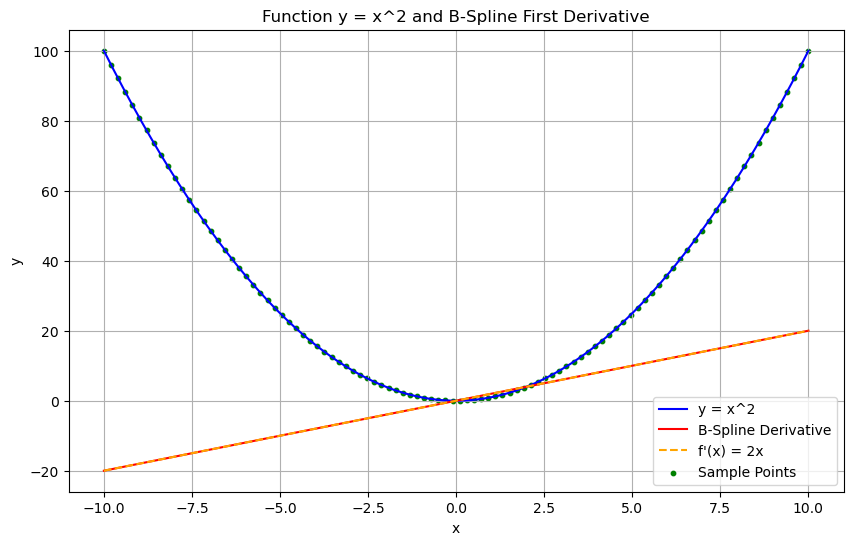

In [59]:
import numpy as np
from scipy.interpolate import BSpline, make_interp_spline
import matplotlib.pyplot as plt

# Define the function y = x^2
def f(x):
    return x**2

# Create data points to approximate the function
x_data = np.linspace(-10, 10, 100)
y_data = f(x_data)

# Degree of the spline
degree = 3

# Compute knots for B-spline
knot_spacing = 10  # Adjust for knot density
knots = np.linspace(-10-knot_spacing*degree, 10 + knot_spacing*degree, len(x_data)//10 + degree + 1)

# Make a B-spline representation of the data
b_spline = make_interp_spline(x_data, y_data, k=degree)

# Compute the first derivative of the B-spline
b_spline_derivative = b_spline.derivative(nu=1)

# Sample the original function and its spline derivative
x_fine = np.linspace(-10, 10, 300)
y_fine = f(x_fine)
y_derivative = b_spline_derivative(x_fine)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(x_fine, y_fine, label='y = x^2', color='blue')
plt.plot(x_fine, y_derivative, label='B-Spline Derivative', color='red')
plt.plot(x_fine, 2*x_fine, label='f\'(x) = 2x', linestyle='--', color='orange')
plt.scatter(x_data, y_data, label='Sample Points', color='green', s=10)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Function y = x^2 and B-Spline First Derivative')
plt.legend()
plt.grid(True)
plt.show()

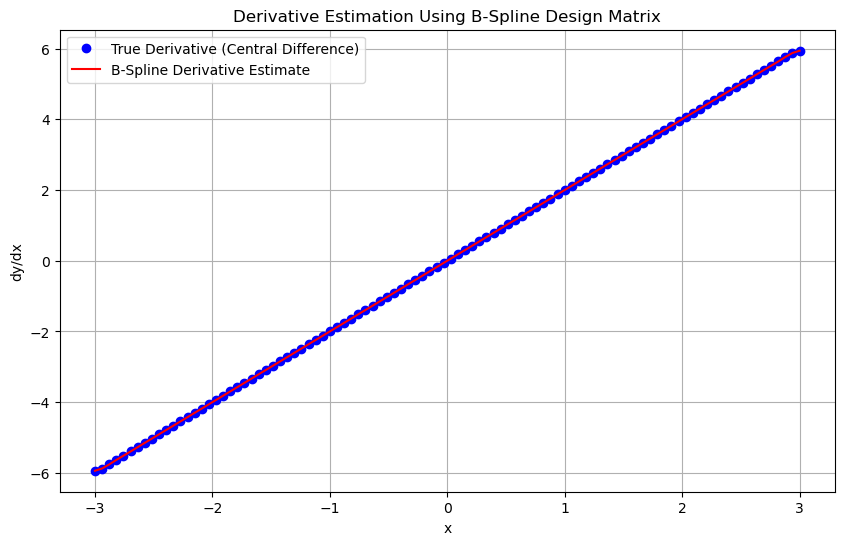

In [62]:
import numpy as np
from scipy.interpolate import BSpline
import matplotlib.pyplot as plt

def bspline_design_matrix(x, knots, degree):
    # Construct B-spline basis functions
    n_knots = len(knots) - degree - 1
    c = np.eye(n_knots)
    spline_bases = [BSpline(knots, c[i], degree) for i in range(n_knots)]
    
    # Compute the design matrix for the first derivative
    design_matrix = np.zeros((len(x), n_knots))
    for i, spline in enumerate(spline_bases):
        design_matrix[:, i] = spline.derivative()(x)
    
    return design_matrix

# Define the function y = x^2
def f(x):
    return x**2

# Example scenario
x_data = np.linspace(-3, 3, 100)
y_data = f(x_data)

# Define knots and degree for B-spline
degree = 3
knots = np.linspace(-3, 3, len(x_data)//2 + degree + 1)
knots = np.concatenate(([knots[0]]*degree, knots, [knots[-1]]*degree))

# Compute derivative design matrix
design_matrix = bspline_design_matrix(x_data, knots, degree)

# Estimated coefficients (here we use y_data for simplicity)
# In practice, these would be fitted against y_data using optimization techniques
coefficients = np.linalg.lstsq(design_matrix, np.gradient(y_data, x_data), rcond=None)[0]

# Evaluate the B-spline derivative at finer points
x_fine = np.linspace(-3, 3, 100)
y_derivative_estimate = design_matrix @ coefficients

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(x_data, np.gradient(y_data, x_data), 'o', label='True Derivative (Central Difference)', color='blue')
plt.plot(x_fine, BSpline(knots, coefficients, degree).derivative()(x_fine), label='B-Spline Derivative Estimate', color='red')
plt.xlabel('x')
plt.ylabel('dy/dx')
plt.title('Derivative Estimation Using B-Spline Design Matrix')
plt.legend()
plt.grid(True)
plt.show()

In [63]:
design_matrix.shape

(100, 56)